In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso

%matplotlib inline

In [2]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
df = pd.read_pickle('country_pic_2')

### EDA

In [4]:
del df['Consumption-based CO2 emissions']

In [5]:
df.head()

,Annual greenhouse gas emissions,Population density,Population (Gapminder & UN (1800 to 2019)),GDP per capita,Life expectancy,Female employment-to-population ratio,Unemployment rate,Daily supply of calories,Share of the population living in urban areas,Share of the population using the Internet,...,International tourism: Number of arrivals,Beef and buffalo meat consumption per person,Beef production,Share of land area used for agriculture,Forest area (% of land area),Share of important terrerstrial biodiversity sites that are protected,Fossil-fuel subsidies per capita,Death rates from air pollution,Direct disaster economic loss,Wine consumption per person
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,619.64,106000.00,NaN,76.3,53.40,NaN,NaN,43.55,93.54,...,1.10,NaN,NaN,11.11,2.33,31.90,NaN,NaN,NaN,NaN
Afghanistan,18168.86,53.69,38.04,1929.0,64.8,15.48,8.84,2000.0,25.75,10.60,...,NaN,4.59,129691.0,58.07,2.07,6.14,0.83,183.9,52.18,0.00
Angola,41657.16,17.33,31.82,8397.0,61.1,69.13,8.17,2270.0,66.18,13.00,...,397000.00,8.42,104761.0,47.48,46.41,28.37,38.37,95.2,69.24,1.32
Anguilla,NaN,135.32,15000.00,NaN,81.9,NaN,NaN,NaN,100.00,NaN,...,NaN,NaN,NaN,NaN,NaN,0.15,NaN,NaN,NaN,NaN
Albania,8898.64,114.91,2.88,11285.0,78.6,39.15,13.87,3400.0,61.23,66.36,...,4.07,22.50,38544.0,42.86,28.16,76.11,21.74,40.5,5.33,1.14


In [6]:
df.columns = df.columns.map(str.strip)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, Aruba to Zimbabwe
Data columns (total 21 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Annual greenhouse gas emissions                                        179 non-null    float64
 1   Population density                                                     222 non-null    float64
 2   Population (Gapminder & UN (1800 to 2019))                             223 non-null    float64
 3   GDP per capita                                                         166 non-null    float64
 4   Life expectancy                                                        223 non-null    float64
 5   Female employment-to-population ratio                                  194 non-null    float64
 6   Unemployment rate                                                      185 non-null   

In [8]:
df.corr()

,Annual greenhouse gas emissions,Population density,Population (Gapminder & UN (1800 to 2019)),GDP per capita,Life expectancy,Female employment-to-population ratio,Unemployment rate,Daily supply of calories,Share of the population living in urban areas,Share of the population using the Internet,...,International tourism: Number of arrivals,Beef and buffalo meat consumption per person,Beef production,Share of land area used for agriculture,Forest area (% of land area),Share of important terrerstrial biodiversity sites that are protected,Fossil-fuel subsidies per capita,Death rates from air pollution,Direct disaster economic loss,Wine consumption per person
Annual greenhouse gas emissions,1.000000,-0.064920,-0.201031,0.078736,0.061845,0.020998,-0.117547,0.168155,0.094058,0.070194,...,-0.023921,0.129967,0.362075,0.083130,-0.053175,0.077426,0.040865,-0.052921,-0.148291,0.074139
Population density,-0.064920,1.000000,0.115011,0.155787,0.197558,-0.000356,-0.028777,0.059500,0.208103,0.152842,...,-0.008751,-0.066830,-0.084846,-0.074677,-0.147406,-0.145503,-0.023712,0.001386,0.419219,-0.051991
Population (Gapminder & UN (1800 to 2019)),-0.201031,0.115011,1.000000,0.004103,0.072446,-0.021170,-0.004392,-0.020461,0.012490,0.039100,...,0.055066,0.022647,-0.225554,-0.193397,0.188438,-0.167638,-0.037430,-0.013511,0.009833,0.012935
GDP per capita,0.078736,0.155787,0.004103,1.000000,0.640768,0.067905,-0.188628,0.697729,0.636345,0.750173,...,-0.300527,0.500515,-0.003125,-0.324043,-0.041233,0.180193,0.429657,-0.584623,-0.114574,0.424266
Life expectancy,0.061845,0.197558,0.072446,0.640768,1.000000,-0.065089,-0.065339,0.681729,0.566535,0.825913,...,-0.274037,0.471553,0.064960,-0.266654,0.029513,0.044340,0.067962,-0.833062,-0.010303,0.507836
Female employment-to-population ratio,0.020998,-0.000356,-0.021170,0.067905,-0.065089,1.000000,-0.399980,-0.074661,-0.083562,-0.051202,...,-0.016129,0.063740,0.073134,-0.020923,0.193479,0.221408,-0.145646,0.116759,-0.090084,0.049662
Unemployment rate,-0.117547,-0.028777,-0.004392,-0.188628,-0.065339,-0.399980,1.000000,-0.040121,0.011572,0.013498,...,0.093196,0.052994,-0.093699,0.080896,-0.039485,-0.139045,-0.132422,-0.065346,0.217223,0.088395
Daily supply of calories,0.168155,0.059500,-0.020461,0.697729,0.681729,-0.074661,-0.040121,1.000000,0.563708,0.712176,...,-0.379204,0.432971,0.118101,-0.027081,-0.024865,0.230655,0.077147,-0.636450,-0.064747,0.466234
Share of the population living in urban areas,0.094058,0.208103,0.012490,0.636345,0.566535,-0.083562,0.011572,0.563708,1.000000,0.660970,...,-0.236595,0.512324,0.009607,-0.199461,-0.002006,0.095051,0.262521,-0.667759,-0.135374,0.384858
Share of the population using the Internet,0.070194,0.152842,0.039100,0.750173,0.825913,-0.051202,0.013498,0.712176,0.660970,1.000000,...,-0.311157,0.513250,0.048678,-0.257092,-0.018567,0.136946,0.189925,-0.831406,-0.026957,0.531407


In [9]:
# Scalar fit and knn for nan
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [10]:

imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(imputer.fit_transform(df2),columns = df2.columns)

In [11]:
df2.head()

,Annual greenhouse gas emissions,Population density,Population (Gapminder & UN (1800 to 2019)),GDP per capita,Life expectancy,Female employment-to-population ratio,Unemployment rate,Daily supply of calories,Share of the population living in urban areas,Share of the population using the Internet,...,International tourism: Number of arrivals,Beef and buffalo meat consumption per person,Beef production,Share of land area used for agriculture,Forest area (% of land area),Share of important terrerstrial biodiversity sites that are protected,Fossil-fuel subsidies per capita,Death rates from air pollution,Direct disaster economic loss,Wine consumption per person
0,0.026242,0.031601,0.108829,0.204418,0.686567,0.630508,0.197947,0.574328,0.4355,0.952158,...,9.316780e-08,0.304936,0.017508,0.128552,0.023708,0.3190,0.200073,0.129814,0.120218,0.161250
1,0.019090,0.002729,0.000038,0.009413,0.343284,0.141974,0.319648,0.120398,0.2575,0.107899,...,4.684704e-01,0.069653,0.140606,0.701305,0.021062,0.0614,0.000538,0.740709,0.000083,0.000000
2,0.043770,0.000874,0.000031,0.055891,0.232836,0.833162,0.295088,0.254726,0.6618,0.132329,...,4.109725e-01,0.139671,0.113578,0.572143,0.472222,0.2837,0.024849,0.366132,0.000111,0.206250
3,0.137293,0.006894,0.015399,0.202876,0.853731,0.492244,0.266276,0.662587,1.0000,0.713640,...,1.242338e-02,0.328739,0.166999,0.463764,0.064286,0.0015,0.102689,0.114358,0.031867,0.108438
4,0.009349,0.005852,0.000002,0.076643,0.755224,0.446921,0.504032,0.816915,0.6123,0.675489,...,3.167705e-06,0.397075,0.041787,0.515795,0.286528,0.7611,0.014079,0.135135,0.000007,0.178125


In [12]:
df2.corr()

,Annual greenhouse gas emissions,Population density,Population (Gapminder & UN (1800 to 2019)),GDP per capita,Life expectancy,Female employment-to-population ratio,Unemployment rate,Daily supply of calories,Share of the population living in urban areas,Share of the population using the Internet,...,International tourism: Number of arrivals,Beef and buffalo meat consumption per person,Beef production,Share of land area used for agriculture,Forest area (% of land area),Share of important terrerstrial biodiversity sites that are protected,Fossil-fuel subsidies per capita,Death rates from air pollution,Direct disaster economic loss,Wine consumption per person
Annual greenhouse gas emissions,1.000000,-0.069963,-0.200831,0.062474,0.037771,0.018635,-0.135822,0.143005,0.091321,0.035676,...,-0.046365,0.080377,0.366607,0.123104,-0.071714,0.089620,0.039434,-0.022853,-0.124489,0.055572
Population density,-0.069963,1.000000,0.111711,0.178233,0.194639,-0.019707,-0.078008,0.085475,0.207693,0.146269,...,-0.014829,0.171169,-0.088914,-0.112159,-0.135665,-0.142491,0.134845,-0.075253,0.144334,-0.047640
Population (Gapminder & UN (1800 to 2019)),-0.200831,0.111711,1.000000,0.019724,0.073521,-0.008868,0.013134,-0.016241,0.013901,0.053012,...,0.035893,0.033557,-0.223313,-0.214717,0.209191,-0.139136,-0.004803,-0.042258,-0.011795,0.026798
GDP per capita,0.062474,0.178233,0.019724,1.000000,0.664056,0.112712,-0.187638,0.612827,0.649865,0.751676,...,-0.254604,0.537169,-0.028434,-0.324411,-0.033077,0.174846,0.437240,-0.595059,-0.175186,0.439960
Life expectancy,0.037771,0.194639,0.073521,0.664056,1.000000,-0.035575,-0.079890,0.679504,0.566991,0.824167,...,-0.296876,0.532369,0.043973,-0.287065,0.026045,0.039108,0.118885,-0.820550,-0.074324,0.498221
Female employment-to-population ratio,0.018635,-0.019707,-0.008868,0.112712,-0.035575,1.000000,-0.380176,-0.062157,-0.071688,-0.027693,...,-0.026384,0.110089,0.058969,-0.027151,0.189885,0.222575,-0.113621,0.070536,-0.151181,0.092192
Unemployment rate,-0.135822,-0.078008,0.013134,-0.187638,-0.079890,-0.380176,1.000000,-0.052405,-0.021365,-0.004804,...,0.099790,-0.008270,-0.093227,0.075559,-0.006280,-0.135303,-0.130694,-0.058445,0.200405,0.055517
Daily supply of calories,0.143005,0.085475,-0.016241,0.612827,0.679504,-0.062157,-0.052405,1.000000,0.553835,0.708453,...,-0.384227,0.473078,0.102535,-0.079804,-0.023927,0.209300,0.111843,-0.640511,-0.156669,0.465758
Share of the population living in urban areas,0.091321,0.207693,0.013901,0.649865,0.566991,-0.071688,-0.021365,0.553835,1.000000,0.655747,...,-0.251200,0.550986,0.001025,-0.219964,0.000208,0.088073,0.283181,-0.630154,-0.188765,0.343885
Share of the population using the Internet,0.035676,0.146269,0.053012,0.751676,0.824167,-0.027693,-0.004804,0.708453,0.655747,1.000000,...,-0.324684,0.564964,0.011308,-0.288859,0.000048,0.123384,0.216984,-0.832002,-0.094253,0.523104


/Users/jennifers/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1350: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)


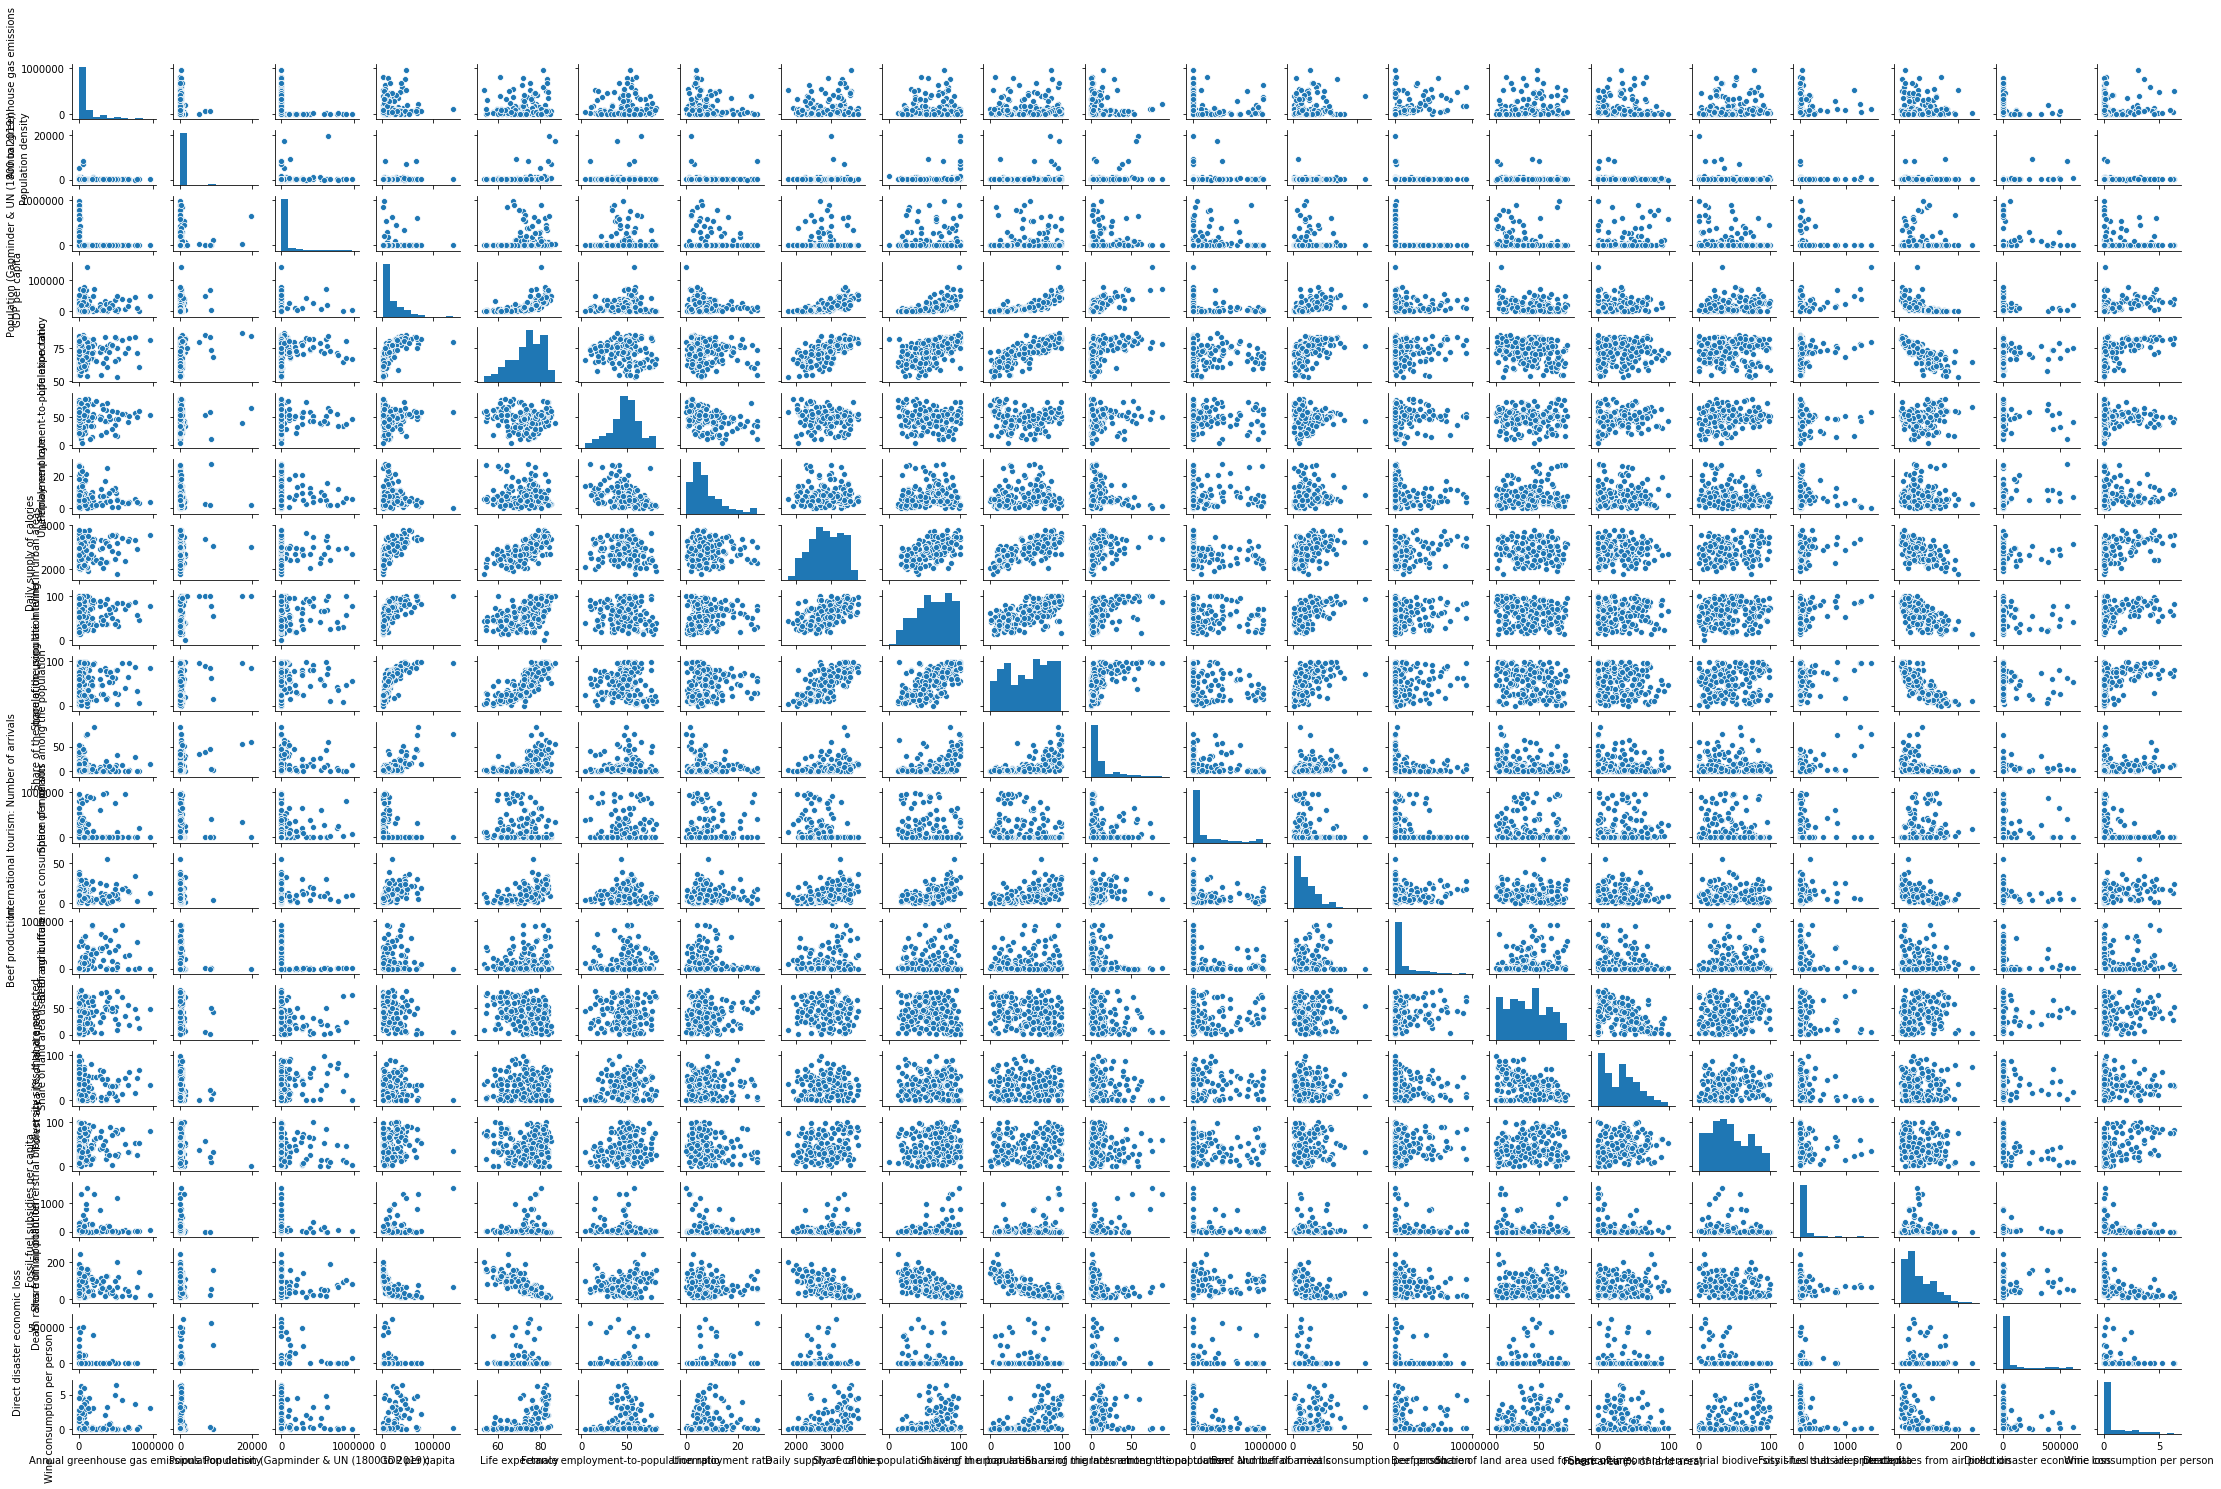

In [227]:
sns.pairplot(df, height=1.2, aspect=1.5);

### log tranform y

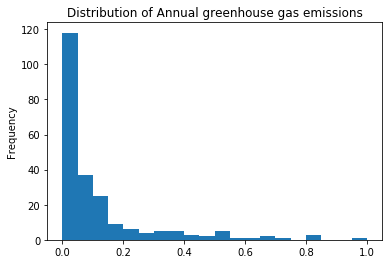

In [69]:
df2['Annual greenhouse gas emissions'].plot(kind='hist',title= "Distribution of Annual greenhouse gas emissions", bins=20);

In [53]:
thisy = (df2['Annual greenhouse gas emissions'])

In [67]:
a_log = np.log(thisy + 1)

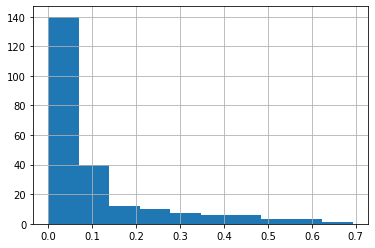

In [68]:
a_log.hist()

### Split data to train, val, test

In [13]:
X = df2[['Population density', 'Population (Gapminder & UN (1800 to 2019))', 'GDP per capita', 'Life expectancy', 'Female employment-to-population ratio', 'Unemployment rate', 'Daily supply of calories', 'Share of the population living in urban areas', 'Share of the population using the Internet', 'Share of migrants among the population', 'International tourism: Number of arrivals', 'Beef and buffalo meat consumption per person', 'Beef production', 'Share of land area used for agriculture', 'Forest area (% of land area)', 'Share of important terrerstrial biodiversity sites that are protected', 'Fossil-fuel subsidies per capita', 'Death rates from air pollution', 'Direct disaster economic loss', 'Wine consumption per person']]

In [14]:
y = df2[['Annual greenhouse gas emissions']]

In [17]:
#Split the data 60 - 20 - 20 train/val/test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [18]:
X_train.columns

Index(['Population density', 'Population (Gapminder & UN (1800 to 2019))',
       'GDP per capita', 'Life expectancy',
       'Female employment-to-population ratio', 'Unemployment rate',
       'Daily supply of calories',
       'Share of the population living in urban areas',
       'Share of the population using the Internet',
       'Share of migrants among the population',
       'International tourism: Number of arrivals',
       'Beef and buffalo meat consumption per person', 'Beef production',
       'Share of land area used for agriculture',
       'Forest area (% of land area)',
       'Share of important terrerstrial biodiversity sites that are protected',
       'Fossil-fuel subsidies per capita', 'Death rates from air pollution',
       'Direct disaster economic loss', 'Wine consumption per person'],
      dtype='object')

In [19]:
X_train.shape

(136, 20)

In [20]:
y_train.shape

(136, 1)

### Baseline model with all variables

In [21]:
#baseline_model = sm.add_constant(X_train)
baseline_model = sm.OLS(y_train, X_train)
baseline_fit = baseline_model.fit()

baseline_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Annual greenhouse gas emissions   R-squared (uncentered):                   0.426
Model:                                         OLS   Adj. R-squared (uncentered):              0.327
Method:                              Least Squares   F-statistic:                              4.310
Date:                             Thu, 08 Oct 2020   Prob (F-statistic):                    2.50e-07
Time:                                     23:01:53   Log-Likelihood:                          48.481
No. Observations:                              136   AIC:                                     -56.96
Df Residuals:                                  116   BIC:                                      1.291
Df Model:                                       20                                                  
Covariance Type:                         nonrobust                                                  
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Population density                                                       -0.0417      0.142     -0.294      0.770      -0.323       0.239
Population (Gapminder & UN (1800 to 2019))                               -0.1315      0.089     -1.481      0.141      -0.307       0.044
GDP per capita                                                            0.1341      0.247      0.544      0.588      -0.354       0.622
Life expectancy                                                          -0.1909      0.158     -1.205      0.231      -0.505       0.123
Female employment-to-population ratio                                    -0.0644      0.100     -0.644      0.521      -0.263       0.134
Unemployment rate                                                        -0.1910      0.112     -1.711      0.090      -0.412       0.030
Daily supply of calories                                                  0.1600      0.120      1.330      0.186      -0.078       0.398
Share of the population living in urban areas                             0.1282      0.102      1.255      0.212      -0.074       0.331
Share of the population using the Internet                                0.1065      0.140      0.761      0.448      -0.171       0.384
Share of migrants among the population                                   -0.0961      0.159     -0.603      0.548      -0.412       0.220
International tourism: Number of arrivals                                -0.0094      0.076     -0.124      0.902      -0.159       0.141
Beef and buffalo meat consumption per person                              0.0411      0.137      0.301      0.764      -0.230       0.312
Beef production                                                           0.3071      0.096      3.208      0.002       0.117       0.497
Share of land area used for agriculture                                   0.0223      0.073      0.305      0.761      -0.123       0.167
Forest area (% of land area)                                              0.0564      0.083      0.676      0.501      -0.109       0.222
Share of important terrerstrial biodiversity sites that are protected    -0.0320      0.083     -0.383      0.702      -0.197       0.133
Fossil-fuel subsidies per capita                                         -0.0396      0.136     -0.292      0.771      -0.309       0.230
Death rates from air pollution                                            0.1871 

In [22]:
df2.corr()['Annual greenhouse gas emissions'].sort_values(ascending=False)

Annual greenhouse gas emissions                                          1.000000
Beef production                                                          0.366607
Daily supply of calories                                                 0.143005
Share of land area used for agriculture                                  0.123104
Share of the population living in urban areas                            0.091321
Share of important terrerstrial biodiversity sites that are protected    0.089620
Beef and buffalo meat consumption per person                             0.080377
GDP per capita                                                           0.062474
Wine consumption per person                                              0.055572
Fossil-fuel subsidies per capita                                         0.039434
Life expectancy                                                          0.037771
Share of the population using the Internet                               0.035676
Female employmen

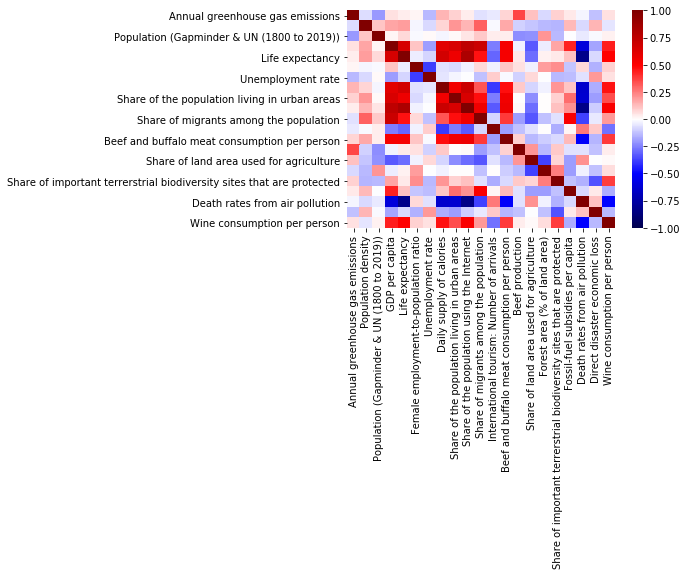

In [70]:
sns.heatmap(df2.corr(), cmap="seismic", vmin=-1, vmax=1)

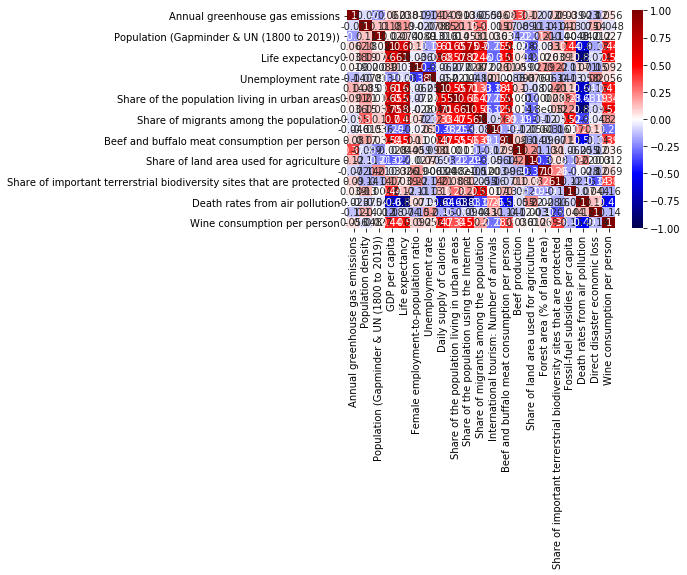

In [21]:
sns.heatmap(df2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train,y_train)


0.22801187919361454

In [24]:
lr.score(X_test,y_test)

-0.14606632066527703

Text(0, 0.5, 'Actual Values')

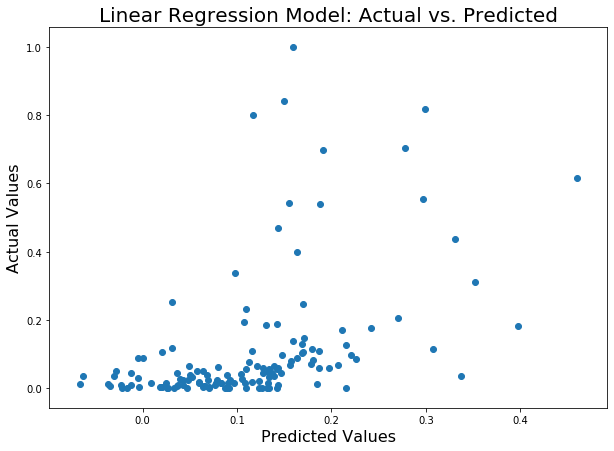

In [25]:
lr_predict = lr.predict(X_train)

plt.figure(figsize=(10,7))

plt.scatter(lr_predict, y_train)

plt.title('Linear Regression Model: Actual vs. Predicted', fontsize=20)

plt.xlabel('Predicted Values', fontsize=16)

plt.ylabel('Actual Values', fontsize=16)

## Feature evaluation with 7 strongest features

In [26]:
#do i need new variables each time? and resplit?

X_lim = df2[['Beef production','Daily supply of calories','Share of land area used for agriculture', 'Share of the population living in urban areas',
            'Population (Gapminder & UN (1800 to 2019))', 'Unemployment rate', 'Direct disaster economic loss']]
y_lim = df2[['Annual greenhouse gas emissions']]

In [27]:
X_train_val_lim, X_test_lim, y_train_val_lim, y_test_lim = train_test_split(X_lim, y_lim, test_size=0.2,random_state=42)
X_train_lim, X_val_lim, y_train_lim, y_val_lim = train_test_split(X_train_val_lim, y_train_val_lim, test_size=.25, random_state=43)

In [28]:
#X_train_lim = sm.add_constant(X_train_lim)
lim_model = sm.OLS(y_train_lim, X_train_lim)
lim_fit = lim_model.fit()

lim_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Annual greenhouse gas emissions   R-squared (uncentered):                   0.397
Model:                                         OLS   Adj. R-squared (uncentered):              0.364
Method:                              Least Squares   F-statistic:                              12.14
Date:                             Thu, 08 Oct 2020   Prob (F-statistic):                    7.51e-12
Time:                                     23:02:51   Log-Likelihood:                          45.112
No. Observations:                              136   AIC:                                     -76.22
Df Residuals:                                  129   BIC:                                     -55.84
Df Model:                                        7                                                  
Covariance Type:                         nonrobust                                                  
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Beef production                                   0.3225      0.088      3.676      0.000       0.149       0.496
Daily supply of calories                          0.1130      0.080      1.408      0.162      -0.046       0.272
Share of land area used for agriculture           0.0296      0.052      0.567      0.572      -0.074       0.133
Share of the population living in urban areas     0.0803      0.071      1.126      0.262      -0.061       0.221
Population (Gapminder & UN (1800 to 2019))       -0.1222      0.081     -1.510      0.133      -0.282       0.038
Unemployment rate                                -0.1528      0.086     -1.783      0.077      -0.322       0.017
Direct disaster economic loss                    -0.0091      0.087     -0.105      0.916      -0.180       0.162
==============================================================================
Omnibus:                       97.552   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.517
Skew:                           2.696   Prob(JB):                    4.25e-118
Kurtosis:                      11.143   Cond. No.                         7.10
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
lr = LinearRegression()
lr.fit(X_train_lim, y_train_lim)
lr.score(X_train_lim,y_train_lim)

0.19085547213384013

In [30]:
lr.score(X_val_lim, y_val_lim)

0.19670577360453134

Text(0, 0.5, 'Actual Values')

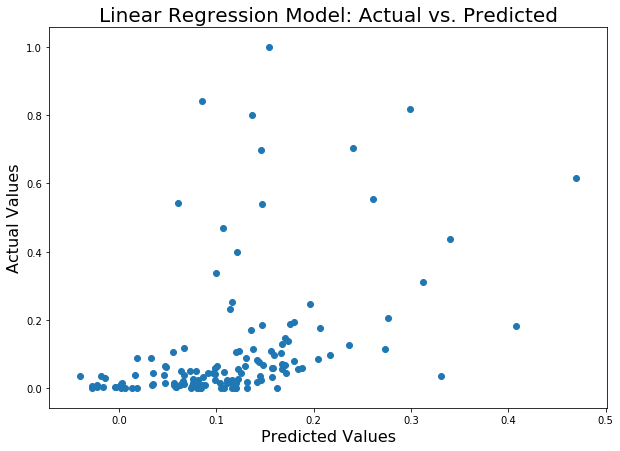

In [31]:
lr_predict_lim = lr.predict(X_train_lim)

plt.figure(figsize=(10,7))

plt.scatter(lr_predict_lim, y_train_lim)

plt.title('Linear Regression Model: Actual vs. Predicted', fontsize=20)

plt.xlabel('Predicted Values', fontsize=16)

plt.ylabel('Actual Values', fontsize=16)

In [40]:
X_lim_trans = df2[['Beef production','Daily supply of calories','Share of land area used for agriculture', 'Share of the population living in urban areas',
            'Population (Gapminder & UN (1800 to 2019))', 'Unemployment rate', 'Direct disaster economic loss']]
y_lim_trans = df2[['Annual greenhouse gas emissions']]

y_lim_trans2 = np.log(y_lim_trans + 1)

In [41]:
X_train_val_lim_trans, X_test_lim_trans, y_train_val_lim_trans2, y_test_lim_trans2 = train_test_split(X_lim_trans, y_lim_trans2, test_size=0.2,random_state=42)
X_train_lim_trans, X_val_lim_trans, y_train_lim_trans2, y_val_lim_trans2 = train_test_split(X_train_val_lim_trans, y_train_val_lim_trans2, test_size=.25, random_state=43)

In [43]:
#X_train_lim = sm.add_constant(X_train_lim)
lim_model_trans = sm.OLS(y_train_lim_trans2, X_train_lim_trans)
lim_fit_trans = lim_model_trans.fit()

lim_fit_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Annual greenhouse gas emissions   R-squared (uncentered):                   0.453
Model:                                         OLS   Adj. R-squared (uncentered):              0.423
Method:                              Least Squares   F-statistic:                              15.27
Date:                             Thu, 08 Oct 2020   Prob (F-statistic):                    1.93e-14
Time:                                     23:16:57   Log-Likelihood:                          85.911
No. Observations:                              136   AIC:                                     -157.8
Df Residuals:                                  129   BIC:                                     -137.4
Df Model:                                        7                                                  
Covariance Type:                         nonrobust                                                  
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Beef production                                   0.2684      0.065      4.129      0.000       0.140       0.397
Daily supply of calories                          0.0895      0.059      1.505      0.135      -0.028       0.207
Share of land area used for agriculture           0.0247      0.039      0.641      0.523      -0.052       0.101
Share of the population living in urban areas     0.0664      0.053      1.256      0.211      -0.038       0.171
Population (Gapminder & UN (1800 to 2019))       -0.0998      0.060     -1.665      0.098      -0.218       0.019
Unemployment rate                                -0.1148      0.063     -1.809      0.073      -0.240       0.011
Direct disaster economic loss                    -0.0026      0.064     -0.041      0.967      -0.129       0.124
==============================================================================
Omnibus:                       84.975   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.334
Skew:                           2.392   Prob(JB):                     3.45e-79
Kurtosis:                       9.393   Cond. No.                         7.10
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
lr = LinearRegression()
lr.fit(X_train_lim_trans, y_train_lim_trans2)
lr.score(X_train_lim_trans,y_train_lim_trans2)

0.21997987256336426

In [45]:
lr.score(X_val_lim_trans, y_val_lim_trans2)

0.2060948443456414

In [74]:
e_y = np.exp(y_train_lim_trans2)

Text(0, 0.5, 'Actual Values')

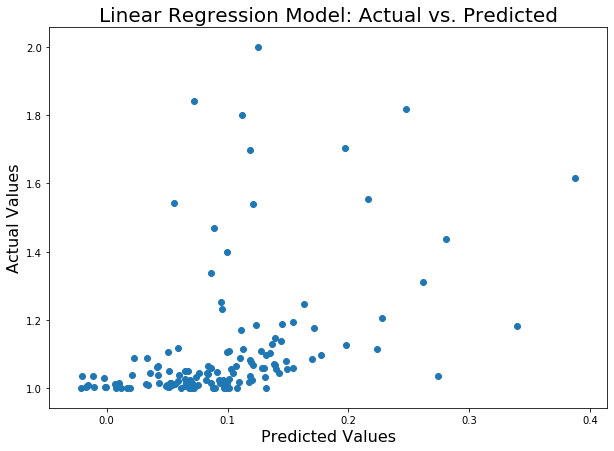

In [75]:
lr_predict_lim_trans = lr.predict(X_train_lim_trans)

plt.figure(figsize=(10,7))

plt.scatter(lr_predict_lim_trans, e_y)

plt.title('Linear Regression Model: Actual vs. Predicted', fontsize=20)

plt.xlabel('Predicted Values', fontsize=16)

plt.ylabel('Actual Values', fontsize=16)

Text(0, 0.5, 'Actual Values')

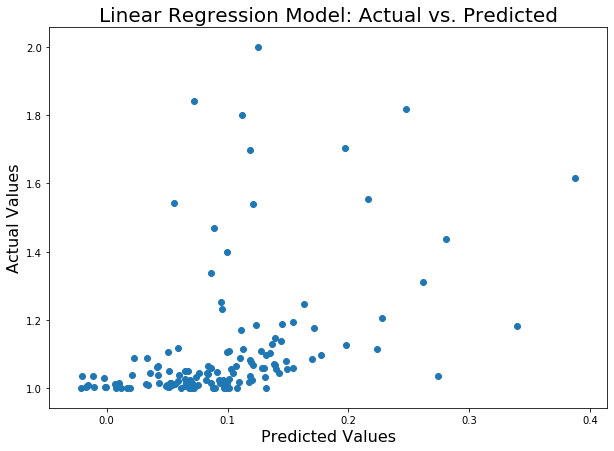

In [79]:
lr_predict_lim_trans = lr.predict(X_train_lim_trans)

plt.figure(figsize=(10,7))

plt.scatter(lr_predict_lim_trans, e_y)

plt.title('Linear Regression Model: Actual vs. Predicted', fontsize=20)

plt.xlabel('Predicted Values', fontsize=16)

plt.ylabel('Actual Values', fontsize=16)

Text(0, 0.5, 'Actual Values')

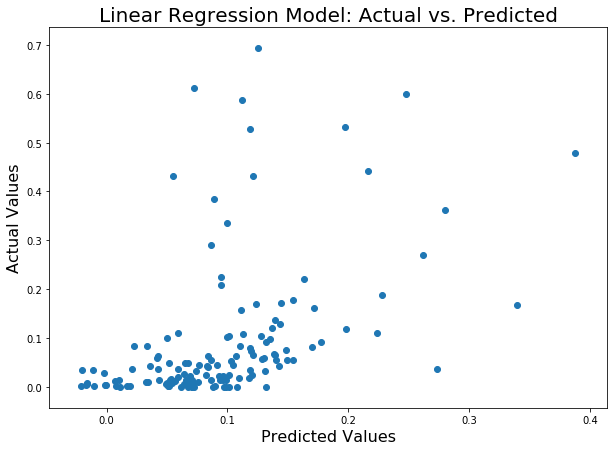

In [76]:
lr_predict_lim_trans = lr.predict(X_train_lim_trans)

plt.figure(figsize=(10,7))

plt.scatter(lr_predict_lim_trans, y_train_lim_trans2)

plt.title('Linear Regression Model: Actual vs. Predicted', fontsize=20)

plt.xlabel('Predicted Values', fontsize=16)

plt.ylabel('Actual Values', fontsize=16)

Text(0, 0.5, 'Residual')

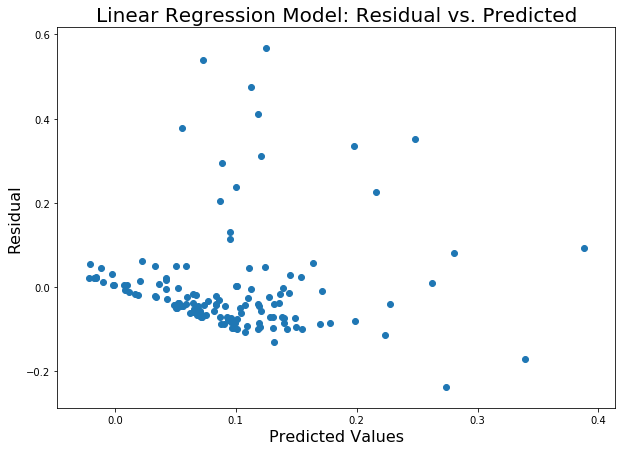

In [48]:
lr_predict_lim_trans2= lr.predict(X_train_lim_trans)

lr_residual_lim_trans2 = y_train_lim_trans2 - lr_predict_lim_trans2

plt.figure(figsize=(10,7))

plt.scatter(lr_predict_lim_trans2, lr_residual_lim_trans2)

plt.title('Linear Regression Model: Residual vs. Predicted', fontsize=20)

plt.xlabel('Predicted Values', fontsize=16)

plt.ylabel('Residual', fontsize=16)


## Model with one feature

In [125]:
X_one = df2[['Beef production']]
y_one = df2[['Annual greenhouse gas emissions']]

In [127]:
X_train_val_one, X_test_one, y_train_val_one, y_test_one = train_test_split(X_one, y_one, test_size=0.2,random_state=42)
X_train_one, X_val_one, y_train_one, y_val_one = train_test_split(X_train_val_one, y_train_val_one, test_size=.25, random_state=43)

In [128]:
#X_train_lim = sm.add_constant(X_train_lim)
one_model = sm.OLS(y_train_one, X_train_one)
one_fit = one_model.fit()

one_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Annual greenhouse gas emissions   R-squared (uncentered):                   0.273
Model:                                         OLS   Adj. R-squared (uncentered):              0.267
Method:                              Least Squares   F-statistic:                              50.62
Date:                             Thu, 08 Oct 2020   Prob (F-statistic):                    5.96e-11
Time:                                     20:51:49   Log-Likelihood:                          32.347
No. Observations:                              136   AIC:                                     -62.69
Df Residuals:                                  135   BIC:                                     -59.78
Df Model:                                        1                                                  
Covariance Type:                         nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Beef production     0.5562      0.078      7.115      0.000       0.402       0.711
==============================================================================
Omnibus:                      103.581   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.838
Skew:                           2.802   Prob(JB):                    6.53e-153
Kurtosis:                      12.606   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
lr = LinearRegression()
lr.fit(X_train_one, y_train_one)
lr.score(X_train_one,y_train_one)

0.12990816825234552

In [131]:
lr.score(X_val_one, y_val_one)

0.22816620257279888

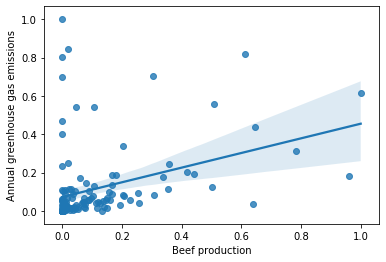

In [132]:
g = sns.regplot(X_train_one,y_train_one)

In [272]:
df2['predict'] = m.fit.predict(X_train)
df2['resid'] = df2.predict - df2.cnt

AttributeError: 'function' object has no attribute 'predict'

### Top 6 variables

In [203]:
X2 = df2[['Beef and buffalo meat consumption per person','Population (Gapminder & UN (1800 to 2019))','Beef production', 'Daily supply of calories','Share of land area used for agriculture', 'Unemployment rate']]

In [204]:
y2 = df2[['Annual greenhouse gas emissions']]

In [205]:
# Fit model with target as housing price index
lm_3 = sm.OLS(y2, X2)  # Notice that `y` is first here

lm_3 = lm_3.fit()

# summarize our model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Annual greenhouse gas emissions   R-squared (uncentered):                   0.427
Model:                                         OLS   Adj. R-squared (uncentered):              0.412
Method:                              Least Squares   F-statistic:                              27.61
Date:                             Thu, 08 Oct 2020   Prob (F-statistic):                    1.58e-24
Time:                                     09:01:18   Log-Likelihood:                         -3044.8
No. Observations:                              228   AIC:                                      6102.
Df Residuals:                                  222   BIC:                                      6122.
Df Model:                                        6                                                  
Covariance Type:                         nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Beef and buffalo meat consumption per person  1135.0889   1340.657      0.847      0.398   -1506.953    3777.131
Population (Gapminder & UN (1800 to 2019))      -0.1434      0.058     -2.474      0.014      -0.258      -0.029
Beef production                                  0.2904      0.059      4.947      0.000       0.175       0.406
Daily supply of calories                        33.2705     10.484      3.174      0.002      12.610      53.931
Share of land area used for agriculture         92.8880    484.539      0.192      0.848    -861.996    1047.772
Unemployment rate                            -3081.9366   1874.413     -1.644      0.102   -6775.857     611.983
==============================================================================
Omnibus:                      136.107   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              753.435
Skew:                           2.433   Prob(JB):                    2.48e-164
Kurtosis:                      10.459   Cond. No.                     3.95e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

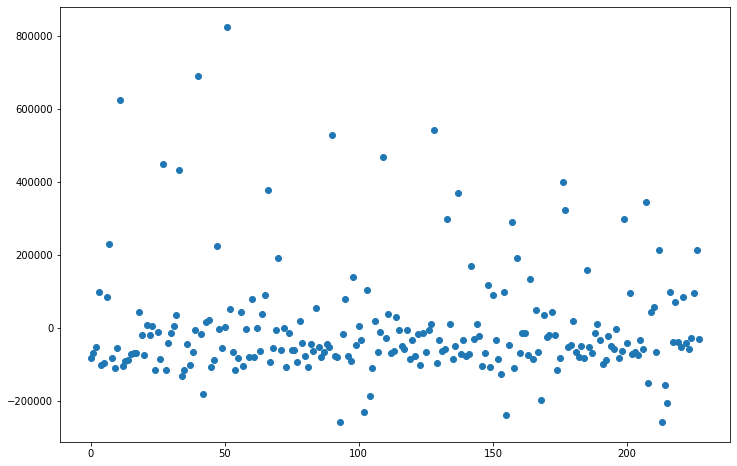

In [208]:
lm_3.resid.plot(style='o', figsize=(12,8));

In [209]:
#test polynomial reg
df2['bp^2'] = df2['Beef production']**2

In [211]:
#test polynomial reg
# Create an empty model
ran = LinearRegression()

# Choose just the X1 column for our data
X4 = df2[['Beef production','bp^2']]

# Choose the response variable
y4 = df2['Annual greenhouse gas emissions']

# Fit the model 
ran.fit(X4, y4)
ran.score(X4,y4)

0.1522811546323546

In [1]:
del df2['bp^2']

NameError: name 'df2' is not defined

In [215]:
df2.corr()['Annual greenhouse gas emissions'].sort_values(ascending=False)

Annual greenhouse gas emissions                                          1.000000
Beef production                                                          0.380489
Daily supply of calories                                                 0.163888
Beef and buffalo meat consumption per person                             0.127308
Share of land area used for agriculture                                  0.098927
Share of important terrerstrial biodiversity sites that are protected    0.089559
GDP per capita                                                           0.079352
Share of the population living in urban areas                            0.076766
Fossil-fuel subsidies per capita                                         0.056007
Wine consumption per person                                              0.040923
Share of the population using the Internet                               0.026653
Life expectancy                                                          0.016230
Female employmen

In [311]:
df3 = df2[['Annual greenhouse gas emissions','Beef production','Daily supply of calories', 'Beef and buffalo meat consumption per person',
        'Share of land area used for agriculture', 'Unemployment rate']]

In [312]:
df3

,Annual greenhouse gas emissions,Beef production,Daily supply of calories,Beef and buffalo meat consumption per person,Share of land area used for agriculture,Unemployment rate
0,218.432,156.60,3123.6,12.168,11.11,6.712
1,18168.860,129691.00,2000.0,4.590,58.07,8.840
2,41657.160,104761.00,2270.0,8.420,47.48,8.170
3,230059.982,112663.83,2939.2,17.846,33.34,6.588
4,8898.640,38544.00,3400.0,22.500,42.86,13.870
...,...,...,...,...,...,...
223,356.090,1933.00,2974.0,10.380,12.37,8.210
224,40924.630,117617.00,2063.0,4.750,44.60,14.040
225,139602.804,1.00,2994.0,18.030,79.83,27.330
226,320254.220,187197.00,2013.0,4.760,32.06,7.790


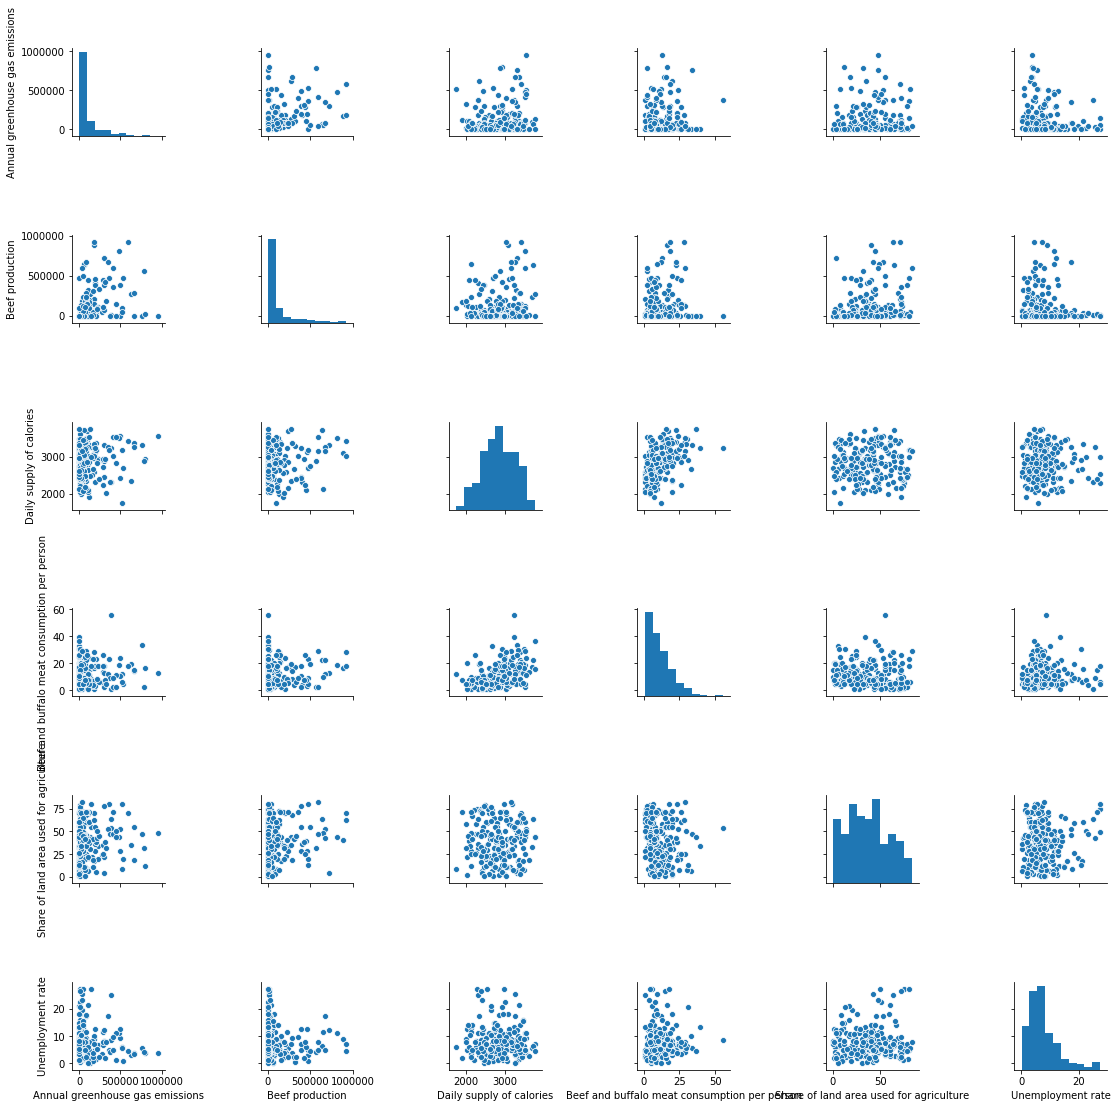

In [313]:
sns.pairplot(df3)

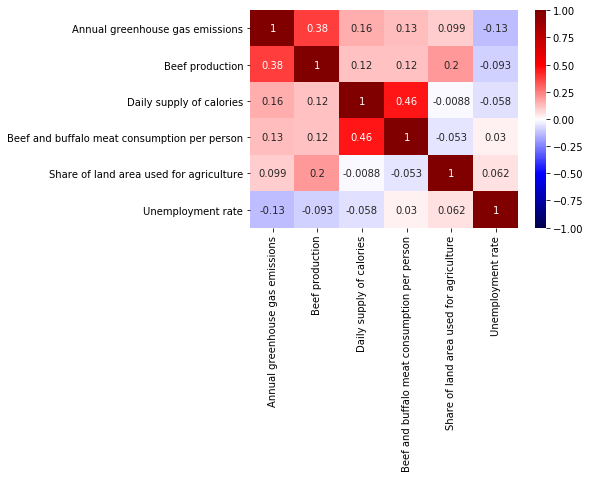

In [314]:
sns.heatmap(df3.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [274]:
X = df2[['Beef production','Daily supply of calories', 'Beef and buffalo meat consumption per person',
        'Share of land area used for agriculture', 'Population (Gapminder & UN (1800 to 2019))', 'Unemployment rate']]

In [275]:
y = df2[['Annual greenhouse gas emissions']]

In [276]:
baseline_model = sm.OLS(y,X)
baseline_fit = baseline_model.fit()
baseline_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Annual greenhouse gas emissions   R-squared (uncentered):                   0.427
Model:                                         OLS   Adj. R-squared (uncentered):              0.412
Method:                              Least Squares   F-statistic:                              27.61
Date:                             Thu, 08 Oct 2020   Prob (F-statistic):                    1.58e-24
Time:                                     11:52:54   Log-Likelihood:                         -3044.8
No. Observations:                              228   AIC:                                      6102.
Df Residuals:                                  222   BIC:                                      6122.
Df Model:                                        6                                                  
Covariance Type:                         nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Beef production                                  0.2904      0.059      4.947      0.000       0.175       0.406
Daily supply of calories                        33.2705     10.484      3.174      0.002      12.610      53.931
Beef and buffalo meat consumption per person  1135.0889   1340.657      0.847      0.398   -1506.953    3777.131
Share of land area used for agriculture         92.8880    484.539      0.192      0.848    -861.996    1047.772
Population (Gapminder & UN (1800 to 2019))      -0.1434      0.058     -2.474      0.014      -0.258      -0.029
Unemployment rate                            -3081.9366   1874.413     -1.644      0.102   -6775.857     611.983
==============================================================================
Omnibus:                      136.107   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              753.435
Skew:                           2.433   Prob(JB):                    2.48e-164
Kurtosis:                      10.459   Cond. No.                     3.95e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Scrape

In [25]:
first train test split
then on train do this
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', coef)

In [26]:
split_and_validate(X, y)


Validation R^2 score was: 0.007733403136055639
Feature coefficient results: 

Beef production : [0.37892848]


In [1]:

poly = PolynomialFeatures(2)
X_with_poly = poly.fit_transform(X)

NameError: name 'PolynomialFeatures' is not defined

In [303]:
def split_and_validate_lasso(X, y, alpha):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a LASSO model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # standard scale data 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # fit LASSO to training data
    clf = Lasso(alpha)
    clf.fit(X_train_scaled, y_train)
    
    # score fit model on validation data
    val_score = clf.score(X_val_scaled, y_val)
    # score train data
    train_score = clf.score(X_train_scaled, y_train)

    
    # report results
    print('\nTrain R2 score was', train_score)
    print('\nValidation R^2 score was:', val_score)

In [304]:
for alpha in [0.08, 0.09, 0.1, .11, 0.12, 0.13, 0.2]:
    print(f"alpha: {alpha}")
    split_and_validate_lasso(X_with_poly, y, alpha)


alpha: 0.08

Train R2 score was 0.3823179993093493

Validation R^2 score was: -0.06448624817276127
alpha: 0.09

Train R2 score was 0.3823179961519544

Validation R^2 score was: -0.06448150096252281
alpha: 0.1

Train R2 score was 0.3823179929756474

Validation R^2 score was: -0.06447675380900852
alpha: 0.11

Train R2 score was 0.3823179897804283

Validation R^2 score was: -0.06447200671224196
alpha: 0.12

Train R2 score was 0.3823179865662971

Validation R^2 score was: -0.06446725967219491
alpha: 0.13

Train R2 score was 0.3823179833332536

Validation R^2 score was: -0.0644625126889049
alpha: 0.2

Train R2 score was 0.38231796017240893

Validation R^2 score was: -0.0644292853943571


/Users/jennifers/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1737253318764.894, tolerance: 567413703.3215678
  positive)
/Users/jennifers/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1735372911889.5828, tolerance: 567413703.3215678
  positive)
/Users/jennifers/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1733495525440.4307, tolerance: 567413703.3215678
  positive)
/Users/jennifers/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conver

In [ ]:
df2_feature_eng = df2_hiphop.copy()
df2_feature_eng['Log(Followers)'] = np.log(df_hiphop['Artist Followers'])

sns.scatterplot(x='Log(Followers)', y='Popularity', data=df_hiphop_feature_eng)